In [1]:
data <- read.csv("dataRegression.csv",sep = ";", dec=".")

In [2]:
str(data)

'data.frame':	1696 obs. of  12 variables:
 $ Clicks           : int  143 126 121 120 111 96 93 88 87 87 ...
 $ Calls            : int  13 10 14 6 8 7 5 6 3 9 ...
 $ Sites            : int  27 29 28 17 24 37 19 17 27 23 ...
 $ Position         : int  2 2 3 1 2 6 2 8 1 2 ...
 $ DayOfWeek        : int  5 5 4 3 4 3 5 5 7 6 ...
 $ HasSocialAccounts: int  1 1 1 1 1 1 1 1 1 1 ...
 $ nom1             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nom2             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nom3             : int  0 0 0 1 0 1 0 0 0 0 ...
 $ nom4             : int  0 0 1 0 1 0 0 0 0 0 ...
 $ nom5             : int  1 1 0 0 0 0 1 1 0 0 ...
 $ nom6             : int  0 0 0 0 0 0 0 0 0 1 ...


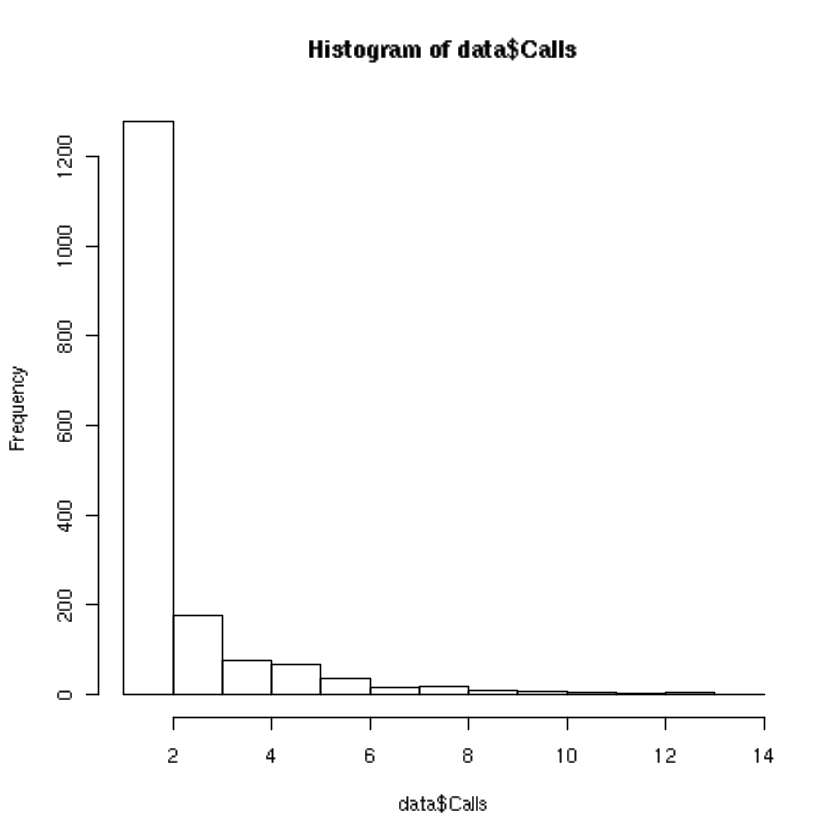

In [192]:
hist(data$Calls)

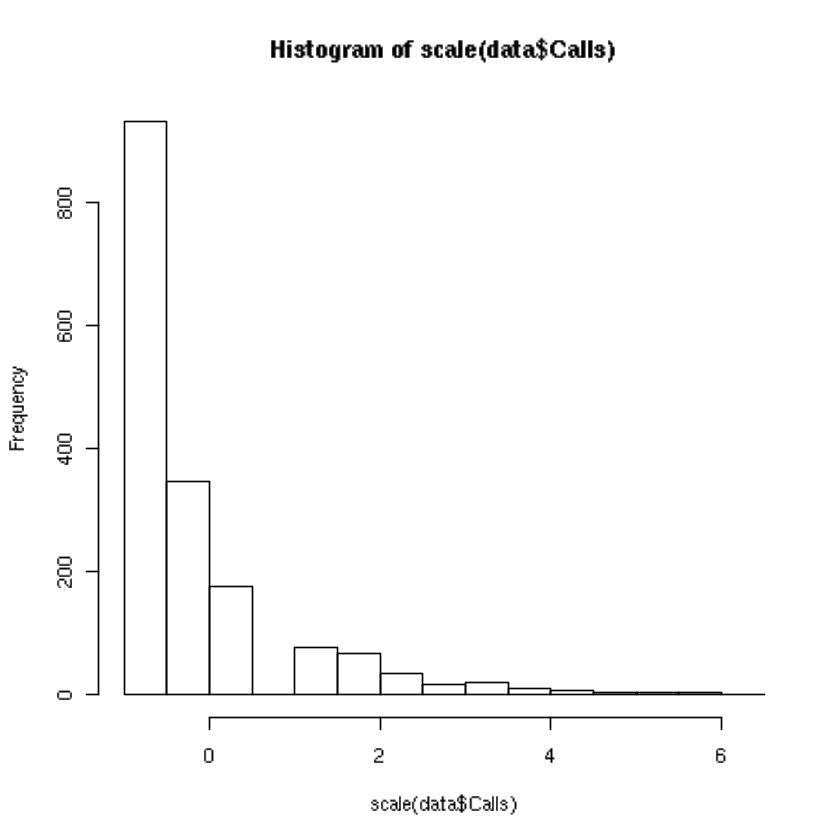

In [193]:
hist(scale(data$Calls))

# Linear regression with all variables

In [6]:
lmodel <- lm(Sites ~ Clicks+Calls+HasSocialAccounts+nom1+nom2+nom3+nom4+nom5+nom6, data=data )

In [7]:
anova(lmodel)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Clicks,1,30968.957614,30968.957614,4827.0590620,0.000000e+00
Calls,1,1002.318427,1002.318427,156.2290312,2.386507e-34
HasSocialAccounts,1,26.673379,26.673379,4.1575172,4.160580e-02
nom1,1,1.298942,1.298942,0.2024630,6.527979e-01
nom2,1,3.520924,3.520924,0.5487981,4.589124e-01
nom3,1,9.490829,9.490829,1.4793134,2.240522e-01
nom4,1,30.096161,30.096161,4.6910183,3.046045e-02
nom5,1,5.617427,5.617427,0.8755752,3.495505e-01
nom6,1,2.935630,2.935630,0.4575698,4.988547e-01
Residuals,1686,10816.868380,6.415699,NA,NA


In [8]:
summary(lmodel)


Call:
lm(formula = Sites ~ Clicks + Calls + HasSocialAccounts + nom1 + 
    nom2 + nom3 + nom4 + nom5 + nom6, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5689  -0.9306  -0.1856   0.6021  25.2987 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.01743    0.25752  -0.068   0.9461    
Clicks             0.20882    0.00709  29.452   <2e-16 ***
Calls              0.73477    0.05732  12.819   <2e-16 ***
HasSocialAccounts  0.26621    0.13481   1.975   0.0485 *  
nom1              -0.09707    0.28647  -0.339   0.7348    
nom2              -0.07622    0.27898  -0.273   0.7847    
nom3              -0.35019    0.27232  -1.286   0.1986    
nom4              -0.37979    0.27057  -1.404   0.1606    
nom5              -0.09312    0.27776  -0.335   0.7375    
nom6               0.21763    0.32173   0.676   0.4989    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.533 on 1686 d

In [10]:
estimated_coeff <- coefficients (lmodel)

In [11]:
estimated_coeff

(Intercept)            Clicks             Calls HasSocialAccounts 
      -0.01742642        0.20881978        0.73477295        0.26621310 
             nom1              nom2              nom3              nom4 
      -0.09706764       -0.07621745       -0.35019087       -0.37978662 
             nom5              nom6 
      -0.09311872        0.21763393

In [82]:
data1 <- data[,-c(3,4,5)] # delete some columns

In [83]:
str(data1)

'data.frame':	1696 obs. of  9 variables:
 $ Clicks           : int  143 126 121 120 111 96 93 88 87 87 ...
 $ Calls            : int  13 10 14 6 8 7 5 6 3 9 ...
 $ HasSocialAccounts: int  1 1 1 1 1 1 1 1 1 1 ...
 $ nom1             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nom2             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nom3             : int  0 0 0 1 0 1 0 0 0 0 ...
 $ nom4             : int  0 0 1 0 1 0 0 0 0 0 ...
 $ nom5             : int  1 1 0 0 0 0 1 1 0 0 ...
 $ nom6             : int  0 0 0 0 0 0 0 0 0 1 ...


In [87]:
reg_line_points <- c() 
for (obs in as.data.frame(t(as.matrix(data1)))){
    temp <- obs %*% estimated_coeff[2: length(estimated_coeff)] + estimated_coeff[1]
    reg_line_points<-append(reg_line_points, temp)
}

In [88]:
str(reg_line_points)

 num [1:1696] 39.6 33.8 35.4 29.4 28.9 ...


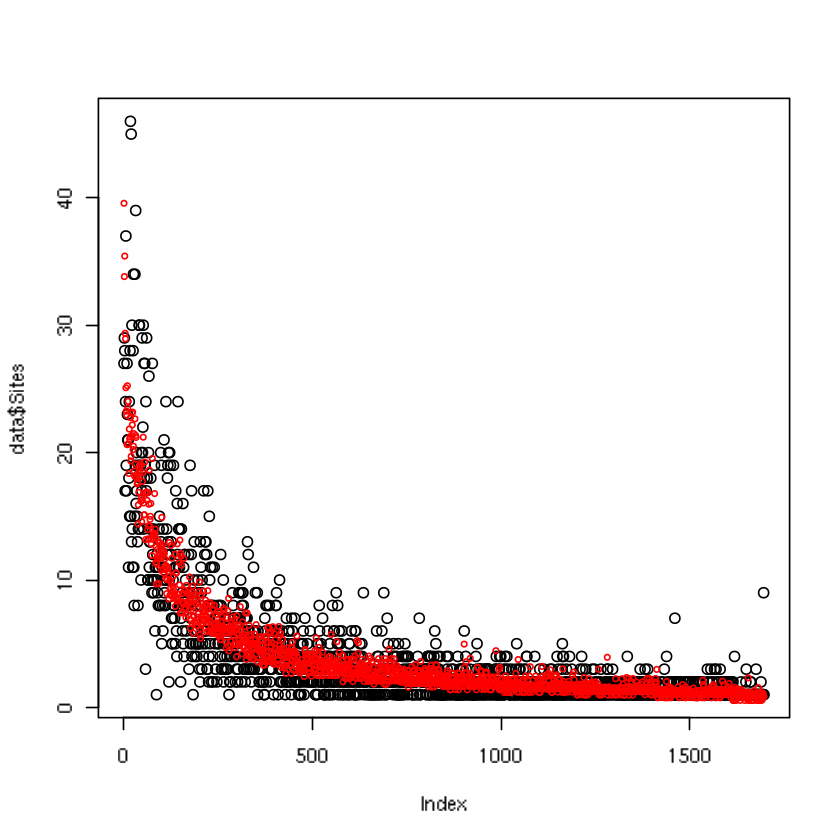

In [101]:
plot(data$Sites)
points(reg_line_points, col ="red", cex = 0.5 )

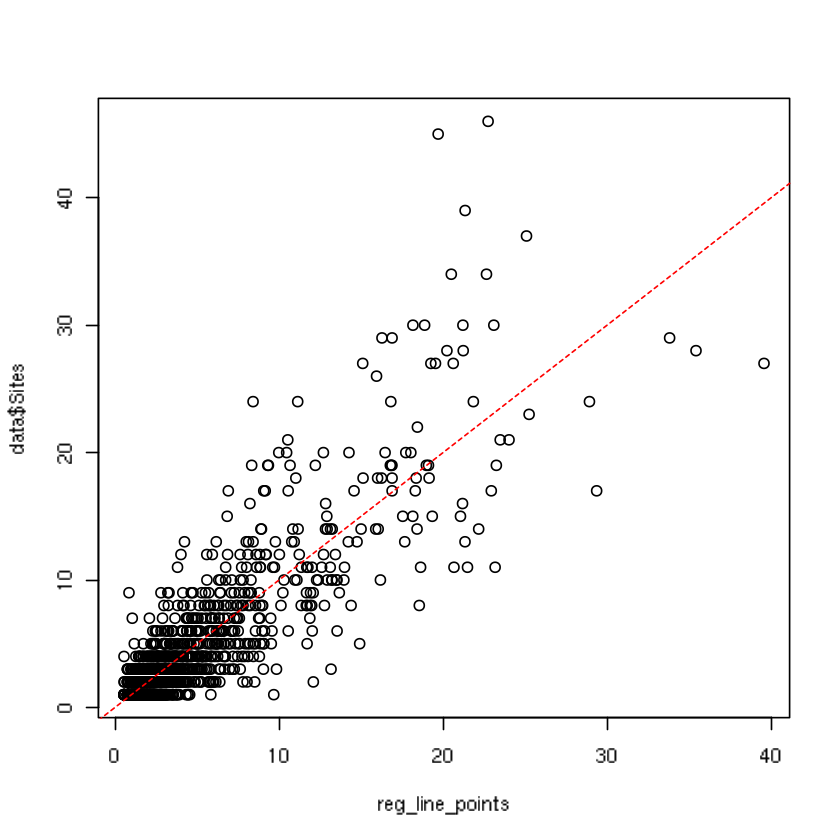

In [113]:
# comparing labels fro training dataset with predicted values
plot(reg_line_points, data$Sites) 
abline(a=0, b = 1, col ="red",lty = 2)

# Linear regression with only statistically significant variables

In [102]:
lmodel2 <- lm(Sites ~  Clicks+Calls+HasSocialAccounts, data = data)

In [105]:
summary(lmodel2)


Call:
lm(formula = Sites ~ Clicks + Calls + HasSocialAccounts, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6981  -0.8729  -0.2196   0.6127  25.6369 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.170244   0.129450  -1.315   0.1886    
Clicks             0.210919   0.007045  29.937   <2e-16 ***
Calls              0.713904   0.056808  12.567   <2e-16 ***
HasSocialAccounts  0.274656   0.134791   2.038   0.0417 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 1692 degrees of freedom
Multiple R-squared:  0.7464,	Adjusted R-squared:  0.746 
F-statistic:  1660 on 3 and 1692 DF,  p-value: < 2.2e-16


In [114]:
estimated_coeff2 <- coefficients(lmodel2)
estimated_coeff2

(Intercept)            Clicks             Calls HasSocialAccounts 
       -0.1702442         0.2109186         0.7139040         0.2746563

In [116]:
data2 <- data[,c(1,2,6)]
str(data2)

'data.frame':	1696 obs. of  3 variables:
 $ Clicks           : int  143 126 121 120 111 96 93 88 87 87 ...
 $ Calls            : int  13 10 14 6 8 7 5 6 3 9 ...
 $ HasSocialAccounts: int  1 1 1 1 1 1 1 1 1 1 ...


In [119]:
reg_line_points2 <- c() 
for (obs in as.data.frame(t(as.matrix(data2)))){
    temp <- obs %*% estimated_coeff[2: length(estimated_coeff2)] + estimated_coeff2[1]
    reg_line_points2<-append(reg_line_points2, temp)
}

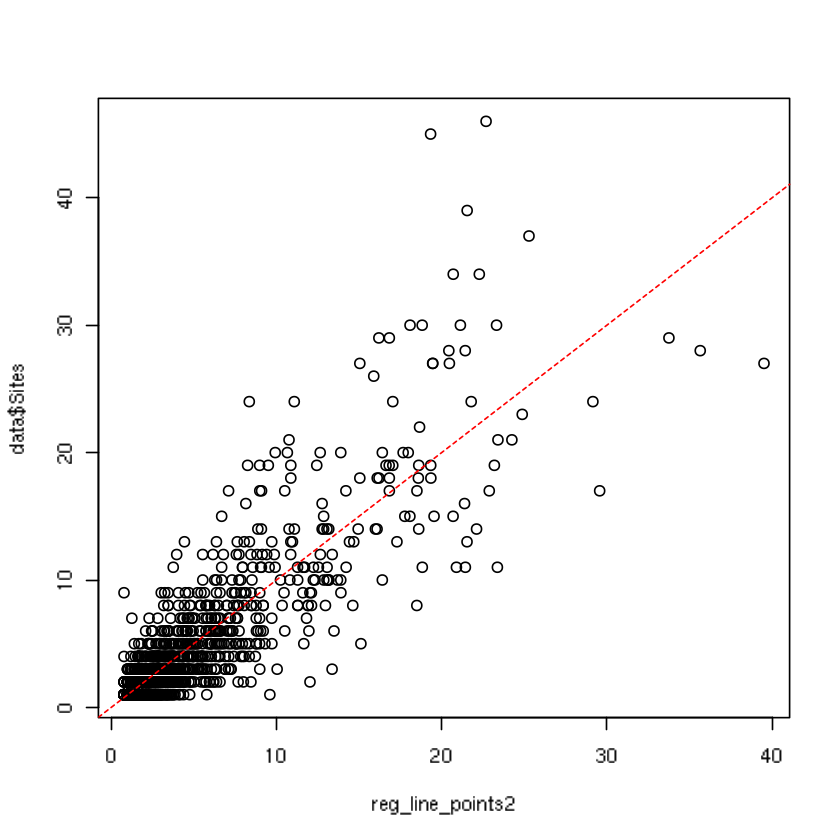

In [120]:
# comparing labels fro training dataset with predicted values
plot(reg_line_points2, data$Sites) 
abline(a=0, b = 1, col ="red",lty = 2)

# Checking on Multicollinearity Problem

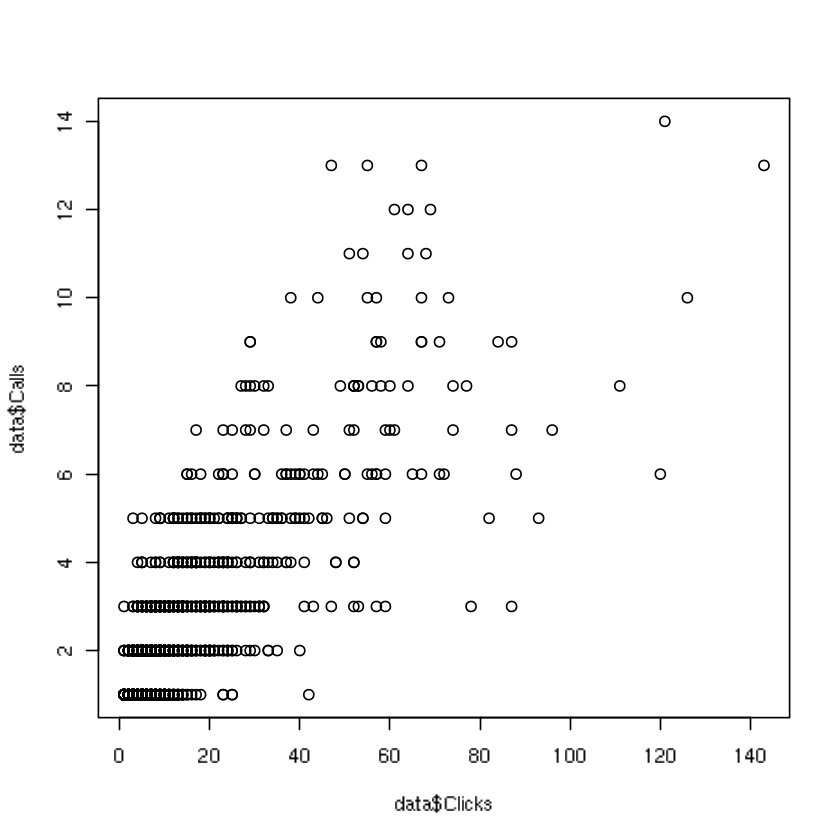

In [134]:
plot(data$Clicks, data$Calls)

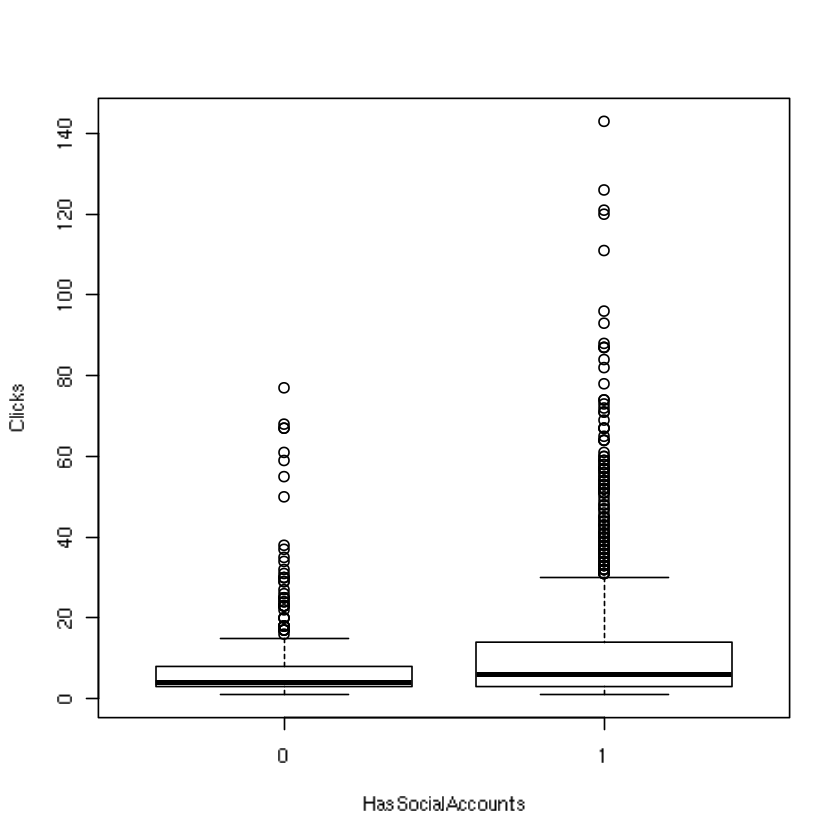

In [150]:
boxplot(Clicks~HasSocialAccounts, data=data)

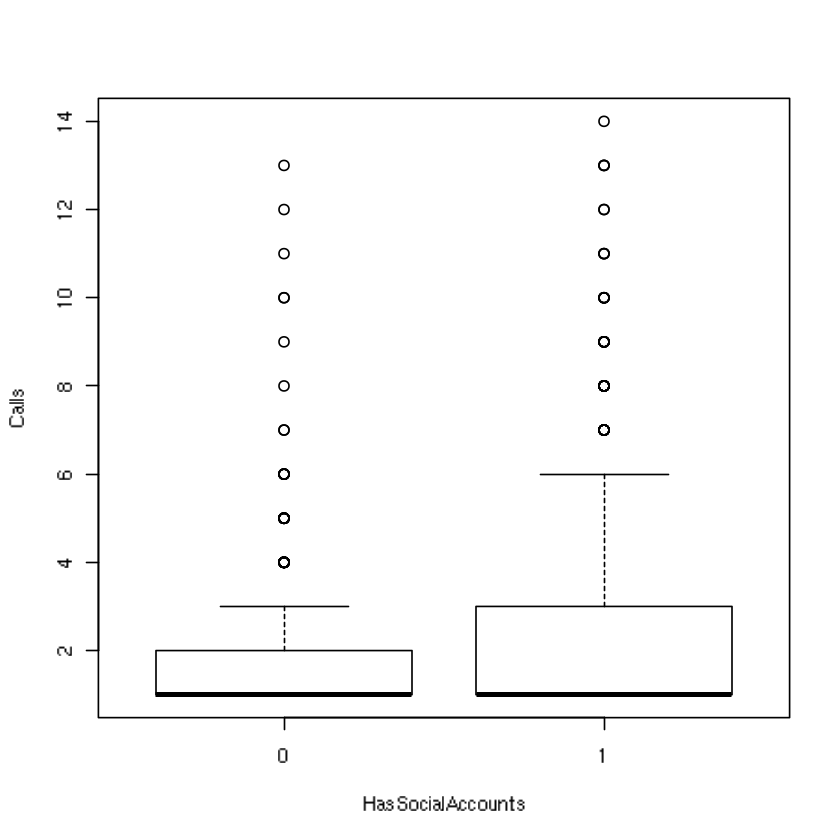

In [151]:
boxplot(Calls~HasSocialAccounts, data=data)

In [132]:
cor(data$Clicks, data$Calls)

[1] 0.8111203

*Variables Calls and Clicka are quite dependent on each other*

In [133]:
install.packages("ltm", repos = "https://cran.r-project.org/")

also installing the dependencies ‘survival’, ‘expm’, ‘Matrix’, ‘msm’, ‘polycor’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [148]:
ltm::biserial.cor(data$Clicks , data$HasSocialAccounts, level = 2)

[1] 0.1667339

In [149]:
ltm::biserial.cor(data$Calls, data$HasSocialAccounts, level = 2)

[1] 0.1104192

# Linear regression without Multicollinearity 

In [152]:
lmodel3 <- lm(Sites ~  Clicks+HasSocialAccounts, data = data)

In [159]:
summary(lmodel3)


Call:
lm(formula = Sites ~ Clicks + HasSocialAccounts, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7047  -0.9301  -0.2419   0.5542  24.5747 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.59816    0.11927   5.015 5.85e-07 ***
Clicks             0.28254    0.00433  65.252  < 2e-16 ***
HasSocialAccounts  0.20175    0.14077   1.433    0.152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.649 on 1693 degrees of freedom
Multiple R-squared:  0.7228,	Adjusted R-squared:  0.7224 
F-statistic:  2207 on 2 and 1693 DF,  p-value: < 2.2e-16


In [153]:
estimated_coeff3 <- coefficients(lmodel3)
estimated_coeff3

(Intercept)            Clicks HasSocialAccounts 
        0.5981615         0.2825396         0.2017466

In [154]:
data3 <- data[,c(1,6)]
str(data3)

'data.frame':	1696 obs. of  2 variables:
 $ Clicks           : int  143 126 121 120 111 96 93 88 87 87 ...
 $ HasSocialAccounts: int  1 1 1 1 1 1 1 1 1 1 ...


In [155]:
reg_line_points3 <- c() 
for (obs in as.data.frame(t(as.matrix(data3)))){
    temp <- obs %*% estimated_coeff3[2: length(estimated_coeff3)] + estimated_coeff3[1]
    reg_line_points3<-append(reg_line_points3, temp)
}

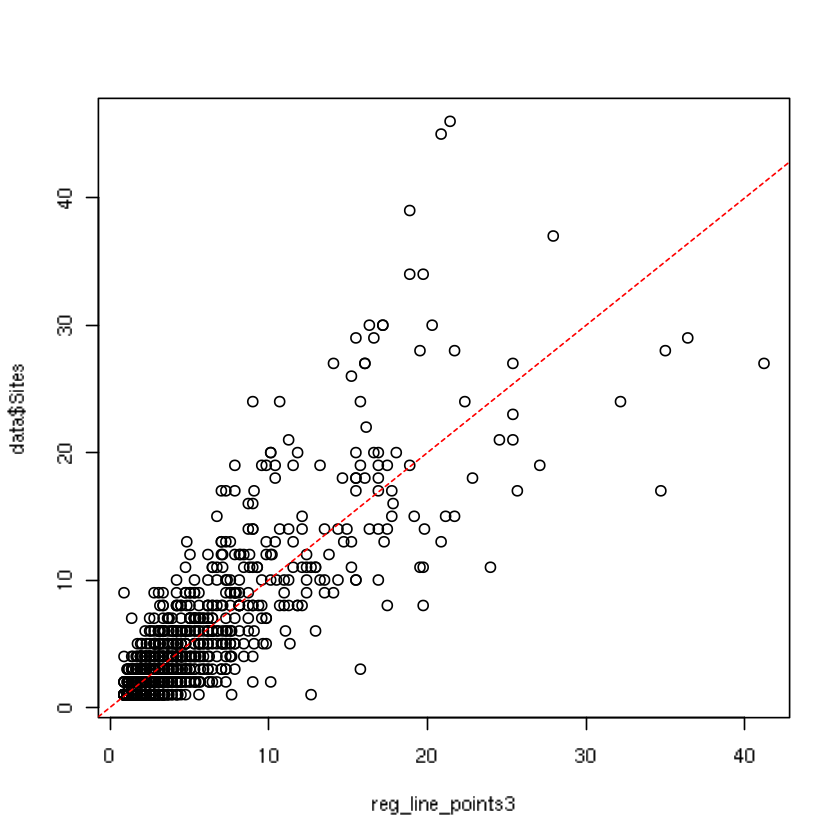

In [156]:
# comparing labels fro training dataset with predicted values
plot(reg_line_points3, data$Sites) 
abline(a=0, b = 1, col ="red",lty = 2)

# Errors analysis 

In [160]:
res3 <- residuals(lmodel3)

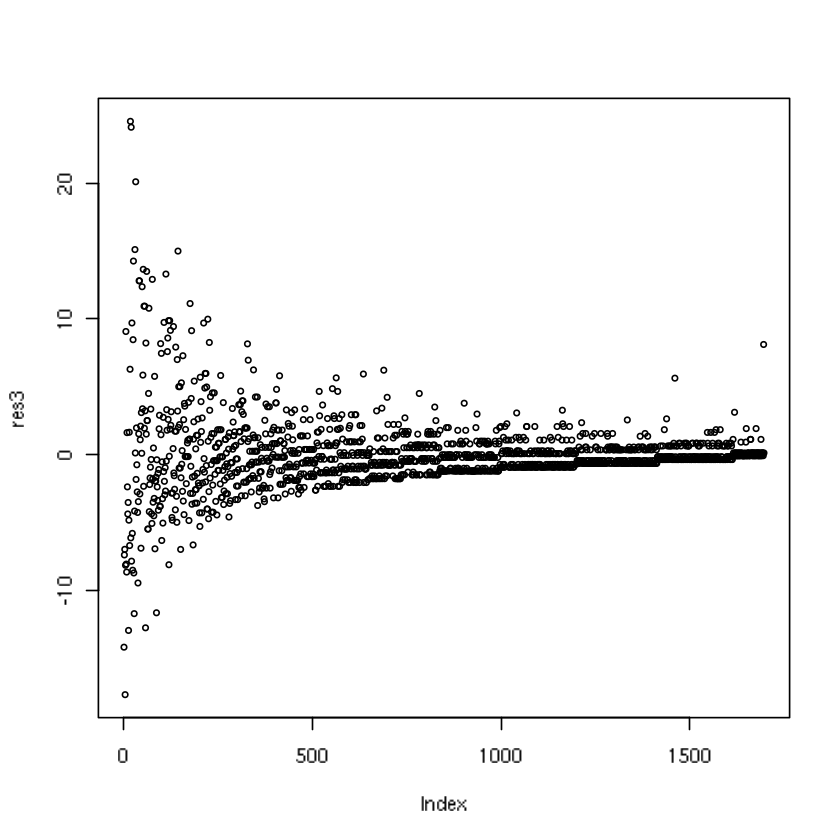

In [161]:
plot(res3, cex = 0.5)

In [162]:
mean(res3)

[1] 1.672901e-16

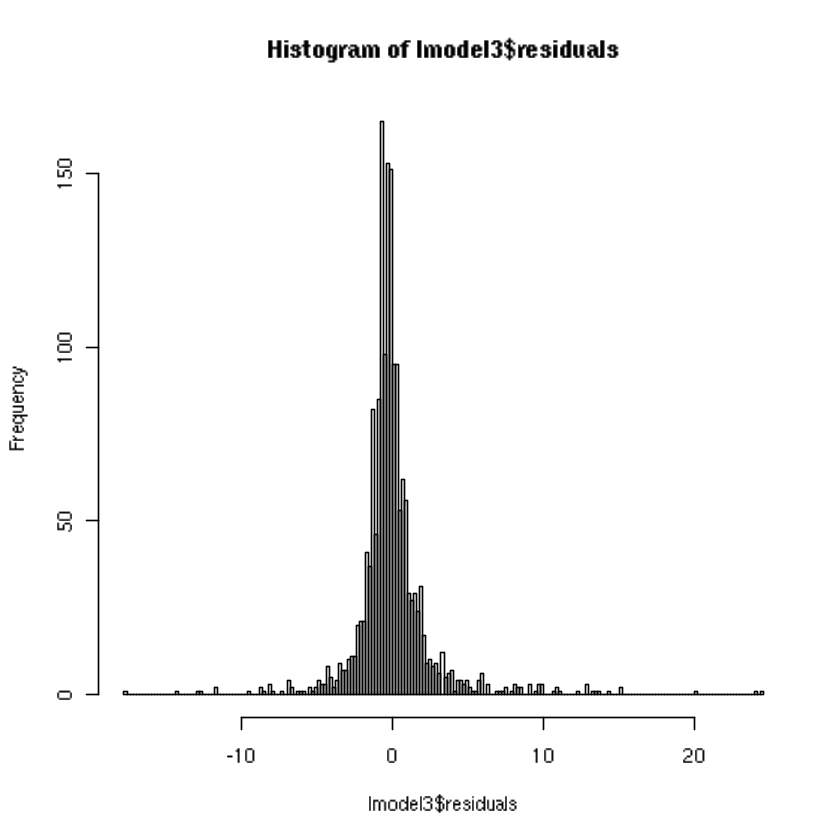

In [165]:
hist(lmodel3$residuals, breaks = "FD")

In [167]:
shapiro.test(res3)



	Shapiro-Wilk normality test

data:  res3
W = 0.74568, p-value < 2.2e-16


*P-value too small, ressiduals are likely not normally distributed*

In [170]:
wilcox.test(res3)


	Wilcoxon signed rank test with continuity correction

data:  res3
V = 597167, p-value = 1.308e-09
alternative hypothesis: true location is not equal to 0


*Wilcoxon test says that expectation of residual random variable is not zero*

In [185]:
install.packages(car, repos ="https://cran.r-project.org/")

ERROR: Error in install.packages(car, repos = "https://cran.r-project.org/"): object 'car' not found


In [177]:
durbinWatsonTest(res3) #checks correlation in residuals

# Predictions

In [195]:
newData <- data.frame(Clicks=c(40,52,38),HasSocialAccounts=c(1,1,0))

In [196]:
newData

Clicks,HasSocialAccounts
40,1
52,1
38,0


In [201]:
pred3 <- predict(lmodel3, newData)

In [200]:
predict(lmodel3, newData, se.fit = TRUE, interval="confidence") # confidence intervals

fit,lwr,upr
12.10149,11.82382,12.37916
15.49197,15.12478,15.85916
11.33467,10.98937,11.67997


In [202]:
predict(lmodel3, newData, se.fit = TRUE, interval="prediction") 
#increases confidence intervals for  the cases of
#very small/large  values of independent variables used for prediction in the comparison  to average 
#value of  x-variables from the training dataset 

fit,lwr,upr
12.10149,6.897485,17.30550
15.49197,10.282417,20.70152
11.33467,6.126613,16.54272


In [203]:
?lm

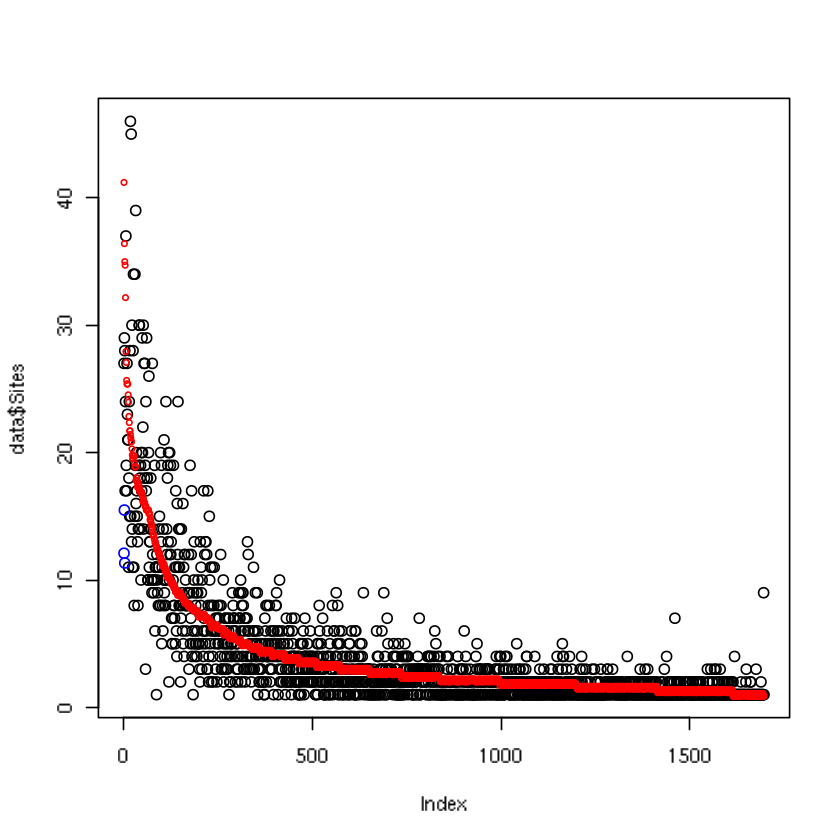

In [206]:
plot(data$Sites)
points(reg_line_points3, col ="red", cex = 0.5 )
points(pred3, col = 'blue', cex = 1)
#black circles are y-values from the training dataset
#red circles are predicted values for the training x -values
#blue points are predictions

# Linear model for cleaned data (outliers removed)

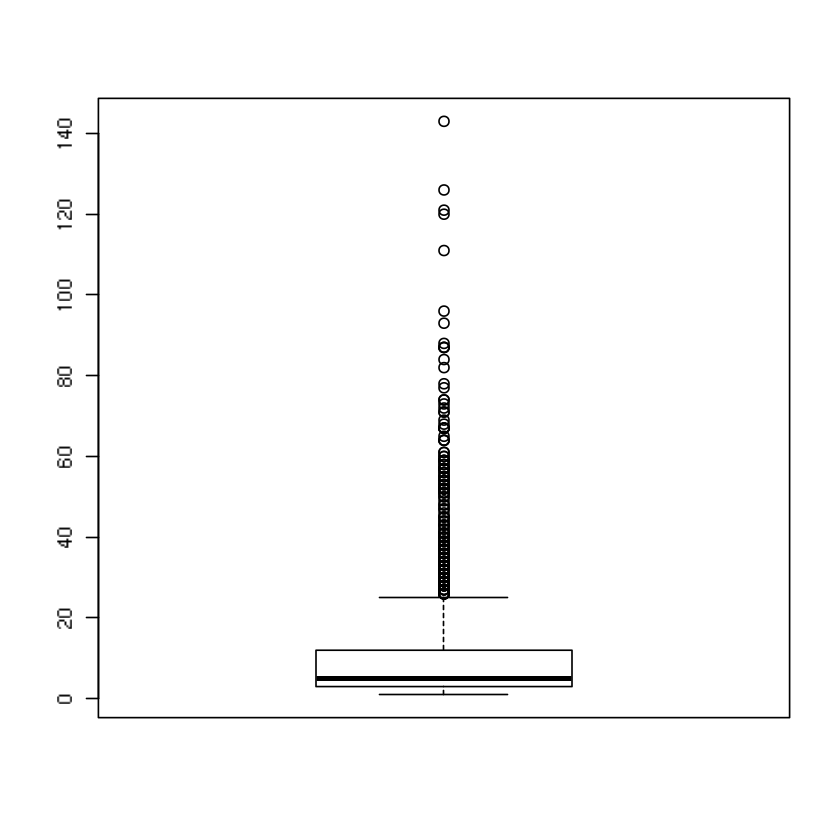

In [212]:
boxplot(data$Clicks)

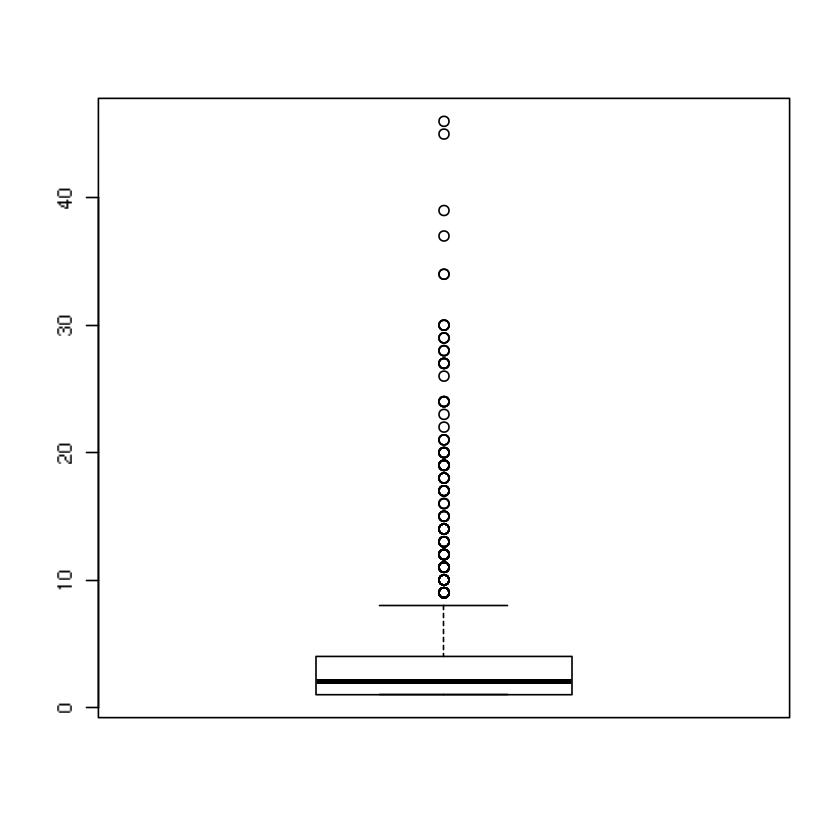

In [262]:
boxplot(data$Sites)

In [254]:
data_cleaned <- data

In [256]:
# one Click -  one site opening is very obvious and won't be useful for analysis
oneSiteOneClick_indx <- which(data$Sites ==1 & data$Clicks == 1)
data_cleaned[oneSiteOneClick_indx, ] <- NA


In [259]:
# Cleaning Clicks  from outliers
# IQR - Interquartile range
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}


In [260]:
data_cleaned$Clicks <- remove_outliers(data_cleaned$Clicks)

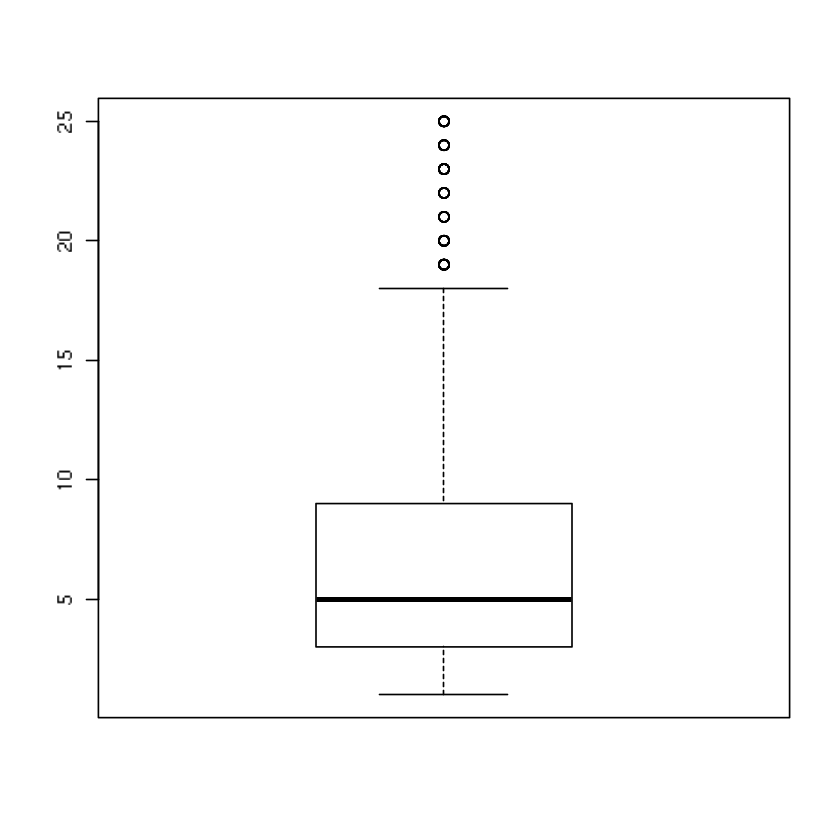

In [261]:
boxplot(data_cleaned$Clicks)

In [263]:
data_cleaned$Sites <- remove_outliers(data_cleaned$Sites)

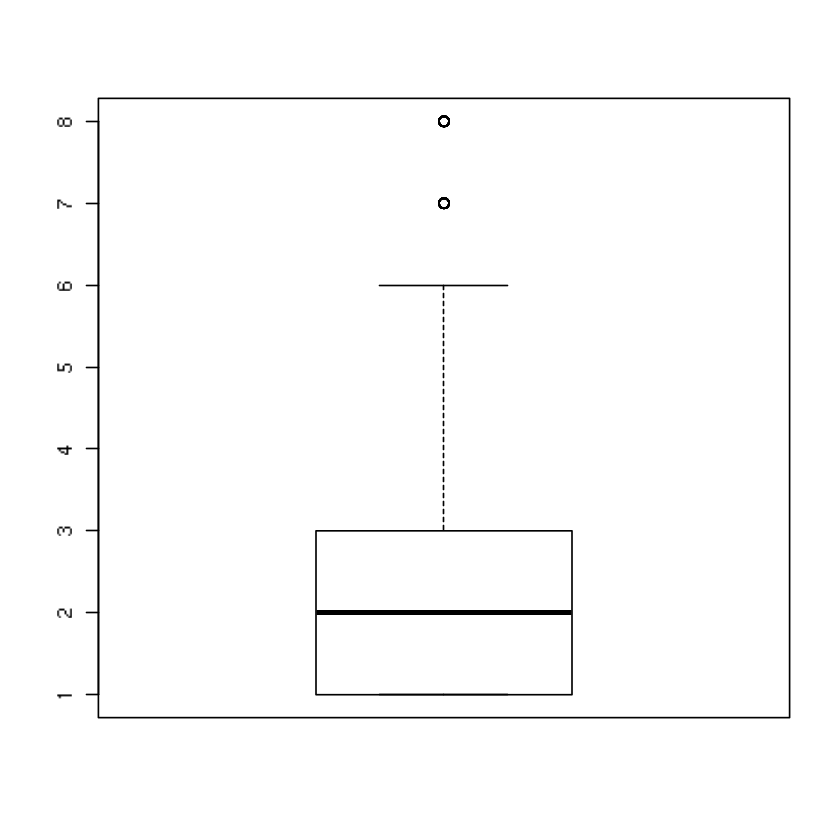

In [264]:
boxplot(data_cleaned$Sites)

In [267]:
lmodel4 <- lm(Sites ~  Clicks+HasSocialAccounts, data = data_cleaned)

In [268]:
coefficients(lmodel4)

(Intercept)            Clicks HasSocialAccounts 
       0.91983164        0.22108404       -0.02109314

In [271]:
res4 <- residuals(lmodel4)

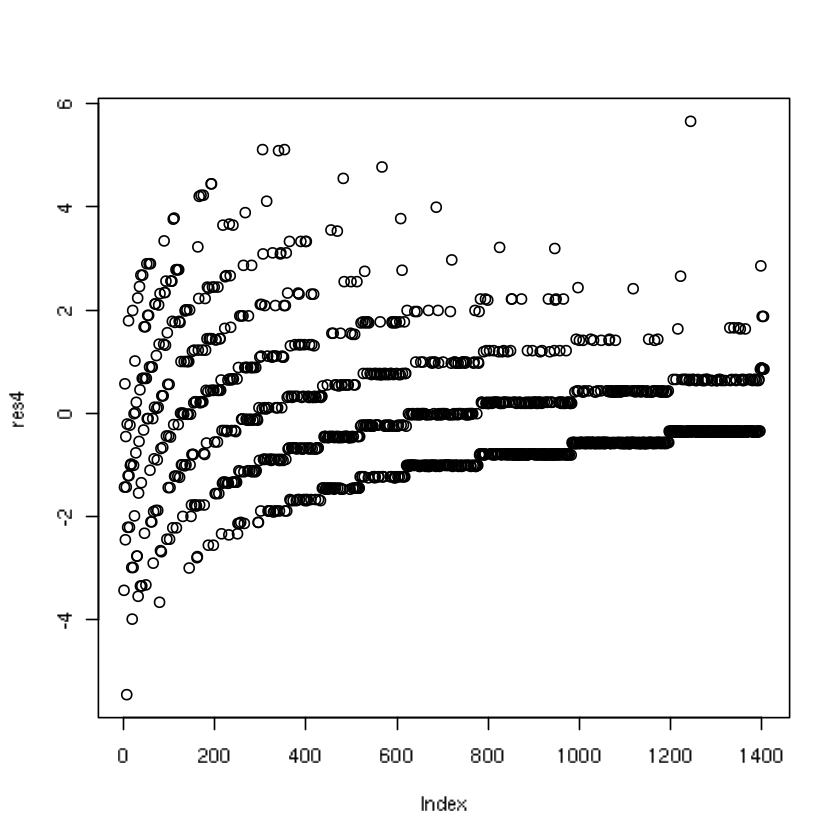

In [272]:
plot(res4)

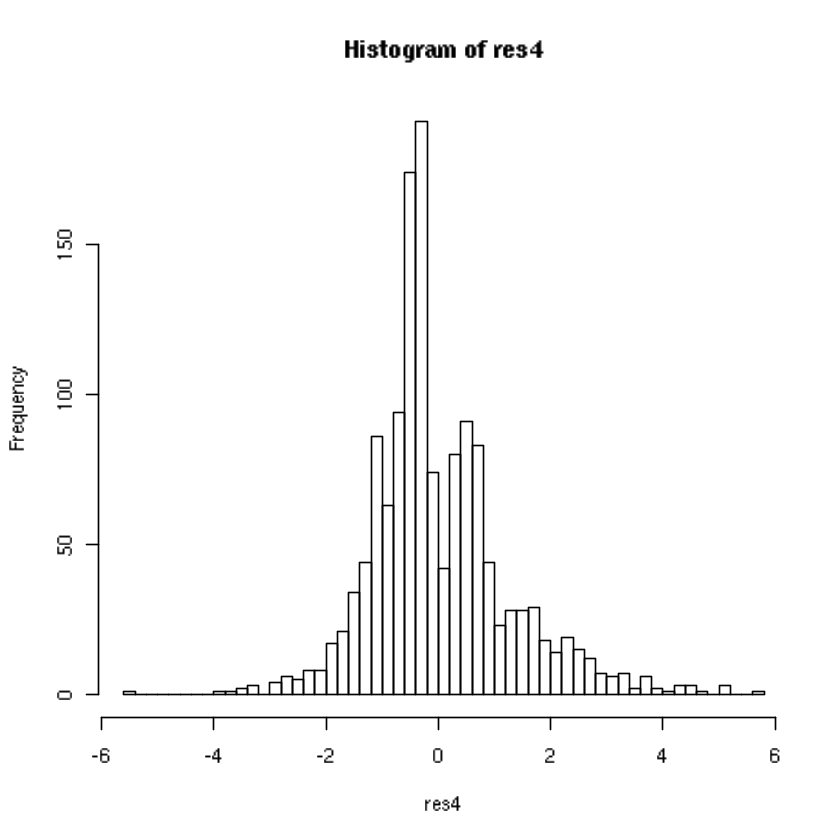

In [273]:
hist(res4, breaks = "FD")

In [274]:
shapiro.test(res4)


	Shapiro-Wilk normality test

data:  res4
W = 0.9459, p-value < 2.2e-16


In [275]:
wilcox.test(res4)


	Wilcoxon signed rank test with continuity correction

data:  res4
V = 436606, p-value = 0.0001671
alternative hypothesis: true location is not equal to 0


*Cleaning data hasn't helped with normalizing errors*

# Test on Heteroscedasticity

In [289]:
res32 <- res3^2
errors_squared_model <- lm(res32 ~ Clicks+HasSocialAccounts, data = data)





In [291]:
summary <- summary(errors_squared_model)

In [292]:
summary$r.squared # the coefficient of determination

[1] 0.2752018

*R^2 are pretty small, so  problem with Heteroscedasticity in the model is improbable  *